In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [17]:
india = pd.read_csv('Dataset/case_time_series.csv')
india['Date'] = pd.date_range('01-30-2020', '07-15-2020')
india.set_index(['Date'], inplace = True)
india

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,
2020-01-30,1,1,0,0,0,0
2020-01-31,0,1,0,0,0,0
2020-02-01,0,1,0,0,0,0
2020-02-02,1,2,0,0,0,0
2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...
2020-07-11,27757,850366,19981,536232,543,22689
2020-07-12,29106,879472,18198,554430,500,23189
2020-07-13,28178,907650,17683,572113,541,23730


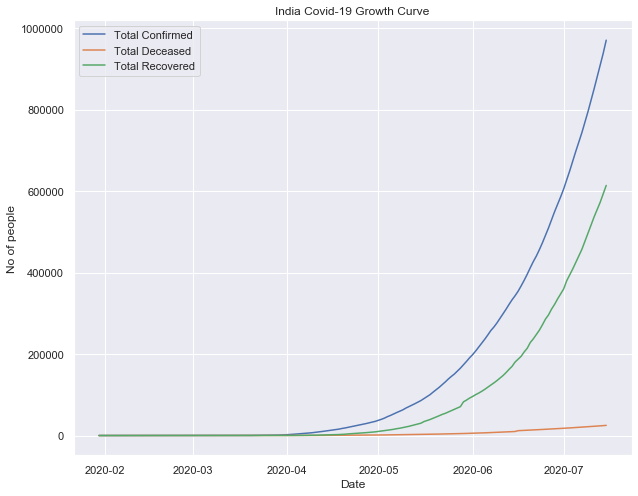

In [28]:
plt.figure(figsize = (10, 8))
plt.plot(india.index, india['Total Confirmed'])
plt.plot(india.index, india['Total Deceased'])
plt.plot(india.index, india['Total Recovered'])
plt.legend(['Total Confirmed', 'Total Deceased', 'Total Recovered'])
plt.xlabel('Date') 
plt.ylabel('No of people')
plt.title('India Covid-19 Growth Curve')
plt.show()